In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('deep-learning/data/pima-indians-diabetes3.csv')
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [6]:
# 각 항목별로 상관계수 알려주는 함수 .corr()
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


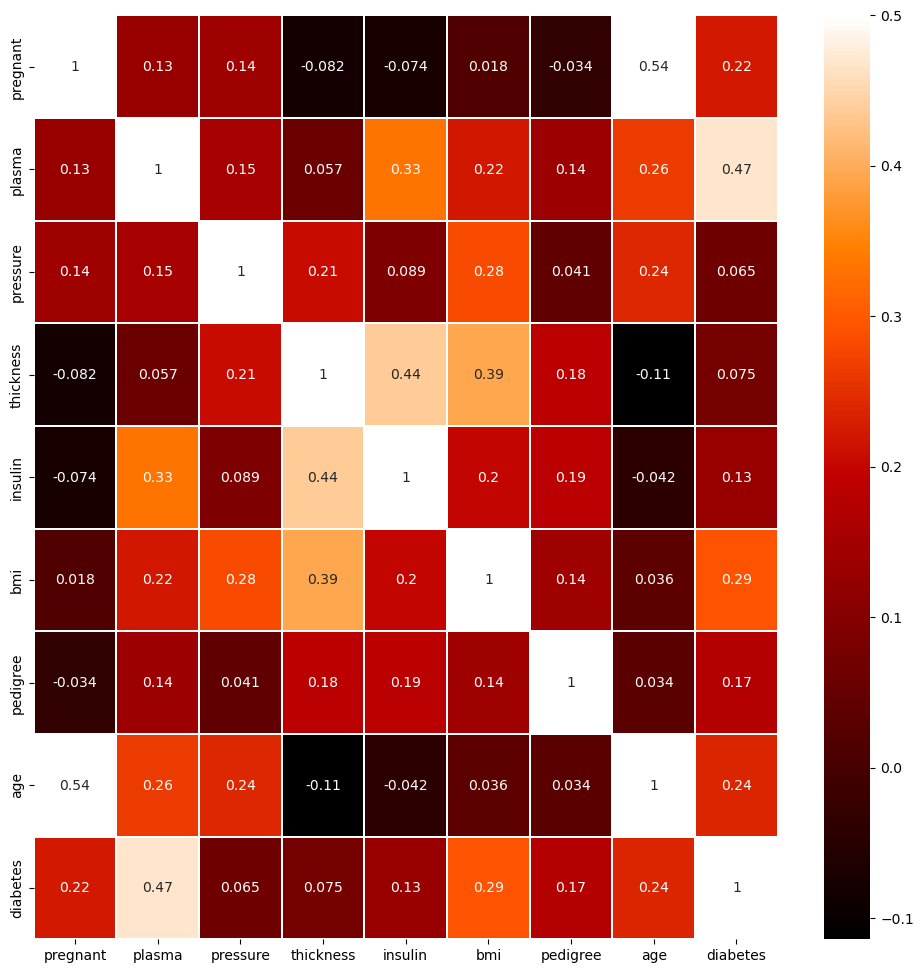

In [10]:
# seaborn에서 제공하는 heatmap으로 상관관계 표현
colormap = plt.cm.gist_heat
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), linewidth=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

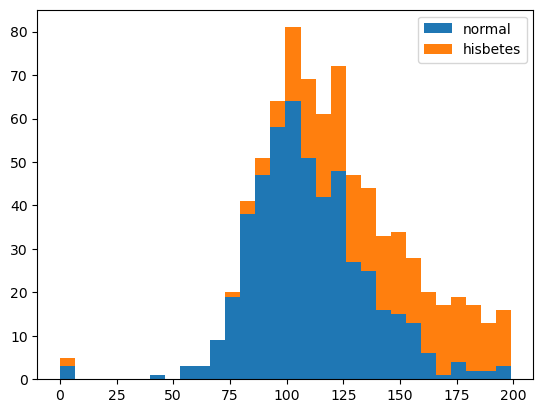

In [11]:
# 히스토그램으로 표현 (정한 범위로 보여줌 // bins=30 ==> 전체 범위를 30등분)
# 플라즈마로 보기
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], 
        bins=30, histtype='barstacked', label=['normal', 'hisbetes'])
plt.legend()
plt.show()

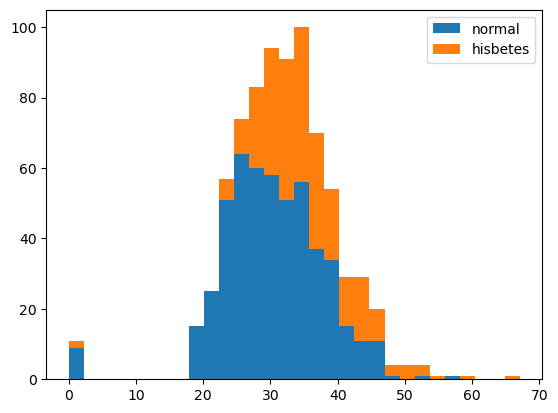

In [12]:
# BMI로 보기
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], 
        bins=30, histtype='barstacked', label=['normal', 'hisbetes'])
plt.legend()
plt.show()

In [13]:
from tensorflow.keras import models, layers

In [14]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
X = df.iloc[:, :8]
y = df.iloc[:, 8]

In [16]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [17]:
model = models.Sequential()
# name 으로 이름지정
model.add(layers.Dense(12, input_dim=8, activation='relu', name='dense01'))
model.add(layers.Dense(8, activation='relu', name='dense02'))
model.add(layers.Dense(1, activation='sigmoid', name='dense03'))

In [18]:
# (8 x w) * (w x 12) + b(12) == 108
# (12 x w) * (w x 8) + b(8) == 104
# (8 x w) * (w x 1) + b(1) = 9
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense01 (Dense)              (None, 12)                108       
_________________________________________________________________
dense02 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense03 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 1s 5ms/step - loss: 10.5062 - accuracy: 0.5650
Epoch 2/100
154/154 [==============================] - 1s 5ms/step - loss: 2.5567 - accuracy: 0.5675
Epoch 3/100
154/154 [==============================] - 1s 5ms/step - loss: 1.1842 - accuracy: 0.6184
Epoch 4/100
154/154 [==============================] - 1s 5ms/step - loss: 0.8709 - accuracy: 0.6448
Epoch 5/100
154/154 [==============================] - 1s 5ms/step - loss: 0.6738 - accuracy: 0.7003
Epoch 6/100
154/154 [==============================] - 1s 5ms/step - loss: 0.6698 - accuracy: 0.6646
Epoch 7/100
154/154 [==============================] - 1s 5ms/step - loss: 0.6664 - accuracy: 0.7166
Epoch 8/100
154/154 [==============================] - 1s 5ms/step - loss: 0.6218 - accuracy: 0.7017
Epoch 9/100
154/154 [==============================] - 1s 5ms/step - loss: 0.5873 - accuracy: 0.7200
Epoch 10/100
154/154 [==============================] - 1s 5ms/step - loss: 0.6011 - accur

### SubClassing

In [24]:
model_name = 'hyuckkibabo'
batch_size = 5
params = {
    'model_name' : model_name,
    'input_dimension' : 8,
    'hidden_dimension_01' : 12,
    'hidden_dimension_02' : 8,
    'output_dimension' : 1
}

In [23]:
import tensorflow as tf

In [28]:
class hyuckkibabo(tf.keras.Model):
    def __init__(self, **kargs):
        super(hyuckkibabo, self).__init__(name=kargs['model_name'])
        # 로컬 변수로 layer 정의
        self.fc1 = layers.Dense(
        kargs['hidden_dimension'],
        input_dim=kargs['input_dimension'],
        activation='relu',
        name='dense01')
        self.fc2 = layers.Dense(kargs['hidden_dimension_02'], activation='relu', name='dense02')
        self.fc3 = layers.Dense(kargs['output_dimension'], activation='sigmoid', name='dense03')
        
    # call 함수 overriding
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [30]:
model = hyuckkibabo(**params)

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=100, batch_size = batch_size)

Epoch 1/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4995 - accuracy: 0.7615
Epoch 2/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4723 - accuracy: 0.7804
Epoch 3/100
154/154 [==============================] - 1s 5ms/step - loss: 0.5046 - accuracy: 0.7549
Epoch 4/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4788 - accuracy: 0.7607
Epoch 5/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4819 - accuracy: 0.7726
Epoch 6/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4711 - accuracy: 0.7628
Epoch 7/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4972 - accuracy: 0.7593
Epoch 8/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4770 - accuracy: 0.7788
Epoch 9/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4596 - accuracy: 0.7912
Epoch 10/100
154/154 [==============================] - 1s 5ms/step - loss: 0.4839 - accura

KeyboardInterrupt: 

In [34]:
result = model.evaluate(X, y)

24/24 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.7500


In [35]:
# 손실 0번인덱스, 정확도 1번인덱스
print(result[0], result[1])

0.5165597200393677 0.75
